In [10]:
import pandas as pd
import numpy as np

In [12]:
data=pd.read_csv("Cars_Data_6k.csv")
data.head()

,Unnamed: 0,Brand,Name,Sticker,Year,KM,Fuel,CV,Transmission,One_owner,...,Weight,Trunk,Tank,Vmax,0to100,Consumption,Emissions,Keys_num,Extras_num,Price
0,0,Opel,Opel Corsa,C,2022.0,47707.0,Diésel,102.0,MANUAL,True,...,1165.0,NaN,-,188.0,10.2,4.1,107.0,1.0,5.0,15700.0
1,1,Peugeot,Peugeot Rifter,C,2019.0,57194.0,Diésel,130.0,AUTO,True,...,1430.0,1355.0,-,179.0,4.3,114.0,NaN,2.0,5.0,24900.0
2,2,Renault,Renault Kadjar,C,2017.0,66428.0,Diésel,110.0,MANUAL,False,...,1380.0,1478.0,-,182.0,11.9,3.8,99.0,2.0,5.0,17800.0
3,3,Dacia,Dacia Sandero,C,2016.0,48430.0,Gasolina,75.0,MANUAL,True,...,941.0,1200.0,-,162.0,14.5,5.8,130.0,2.0,3.0,9300.0
4,4,Nissan,Nissan QASHQAI,C,2020.0,72209.0,Gasolina,160.0,AUTO,False,...,1315.0,1598.0,-,198.0,9.9,6.9,156.0,2.0,5.0,21500.0


In [13]:
data.shape

(5980, 24)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5980 entries, 0 to 5979
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5980 non-null   int64  
 1   Brand         5973 non-null   object 
 2   Name          5973 non-null   object 
 3   Sticker       5948 non-null   object 
 4   Year          5973 non-null   float64
 5   KM            5973 non-null   float64
 6   Fuel          5973 non-null   object 
 7   CV            5973 non-null   float64
 8   Transmission  5973 non-null   object 
 9   One_owner     5973 non-null   object 
 10  Location      4841 non-null   object 
 11  Length        5973 non-null   float64
 12  Width         5964 non-null   float64
 13  Height        5969 non-null   float64
 14  Weight        5953 non-null   float64
 15  Trunk         4613 non-null   float64
 16  Tank          5973 non-null   object 
 17  Vmax          5815 non-null   float64
 18  0to100        5947 non-null 

### Comprobación de valores únicos

In [15]:
data['Brand'].unique()

array(['Opel', 'Peugeot', 'Renault', 'Dacia', 'Nissan', 'BMW', 'KIA',
       'Volkswagen', 'Land Rover', 'Skoda', 'Hyundai', 'Mercedes', 'Ford',
       'Seat', 'Honda', 'Audi', 'Mazda', 'Volvo', 'Citroën', 'Toyota',
       'Mini', 'Suzuki', 'Fiat', 'Cupra', 'Jeep', 'Chevrolet', 'Lexus',
       'Mitsubishi', 'Infiniti', 'SsangYong', 'BYD', 'DS', 'RIMOR',
       'Iveco', 'Porsche', 'Alfa Romeo', 'Jaguar', 'Smart', 'Tesla',
       'Subaru', 'MG', 'XEV', 'DFSK', 'Abarth', nan], dtype=object)

In [16]:
data['Year'].unique()

array([2022., 2019., 2017., 2016., 2020., 2018., 2015., 2021., 2013.,
       2011., 2014., 2023., 2012., 2006., 2010., 2008., 2005., 2009.,
       2004., 2007., 2024., 2002., 2003., 2000.,   nan])

In [17]:
data['Price'].unique()


array([15700., 24900., 17800.,  9300., 21500., 20900., 15690., 13500.,
       23800., 37900., 14450., 26990., 27800., 34300., 14990., 19250.,
        9750., 23900., 12300., 19990., 15490., 12990.,  8990., 24990.,
       21490., 16500., 18200., 21652., 22790., 15200., 16990., 25590.,
       12950., 19590., 10200., 11900., 16490., 15900., 15750., 27990.,
       23700., 15990., 15800., 14400., 20300., 29450., 11990., 12800.,
        8200., 25800., 34800., 15082., 26900., 21990., 13250., 22900.,
       17500., 10450., 18553., 39500., 19500., 22490., 13400., 13990.,
       18500., 10390., 13190., 12390., 13390., 30900., 14500., 20495.,
        4450., 12450.,  6300., 14350.,  3500., 20490., 11250., 57900.,
        2900., 15500., 21950.,  9500., 26500., 29890., 12500., 16300.,
       44500., 28490., 16200., 24338., 15619.,  8950., 46950., 20867.,
        4900., 16450., 14300., 20250.,  3900., 18900., 17400., 21900.,
       20700., 15400.,  7350., 20450.,  7750., 16800., 23290.,  9990.,
      

In [18]:
data['KM'].unique()

array([47707., 57194., 66428., ..., 25215., 69773.,    nan], shape=(1151,))

In [19]:
data['Fuel'].unique()

array(['Diésel', 'Gasolina', 'Híbrido', 'Híbrido Enchufable', 'GLP',
       'Eléctrico', 'GNC', nan], dtype=object)

In [20]:
copy_data=data.copy()

### Problemas de calidad que deben solucionarse

- Year: Tiene valores nan y comas que hay que eliminarse y

In [21]:
# Convertir la columna a valores numéricos (coerce convierte errores a NaN)
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

data = data.dropna(subset=['Year'])

data['Year'] = data['Year'].astype(int)


In [22]:
data['Year'].unique()

array([2022, 2019, 2017, 2016, 2020, 2018, 2015, 2021, 2013, 2011, 2014,
       2023, 2012, 2006, 2010, 2008, 2005, 2009, 2004, 2007, 2024, 2002,
       2003, 2000])

### precio

In [23]:

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

data = data.dropna(subset=['Price'])

data['Price'] = data['Price'].astype(int)


In [24]:
data['Price'].unique()

array([15700, 24900, 17800,  9300, 21500, 20900, 15690, 13500, 23800,
       37900, 14450, 26990, 27800, 34300, 14990, 19250,  9750, 23900,
       12300, 19990, 15490, 12990,  8990, 24990, 21490, 16500, 18200,
       21652, 22790, 15200, 16990, 25590, 12950, 19590, 10200, 11900,
       16490, 15900, 15750, 27990, 23700, 15990, 15800, 14400, 20300,
       29450, 11990, 12800,  8200, 25800, 34800, 15082, 26900, 21990,
       13250, 22900, 17500, 10450, 18553, 39500, 19500, 22490, 13400,
       13990, 18500, 10390, 13190, 12390, 13390, 30900, 14500, 20495,
        4450, 12450,  6300, 14350,  3500, 20490, 11250, 57900,  2900,
       15500, 21950,  9500, 26500, 29890, 12500, 16300, 44500, 28490,
       16200, 24338, 15619,  8950, 46950, 20867,  4900, 16450, 14300,
       20250,  3900, 18900, 17400, 21900, 20700, 15400,  7350, 20450,
        7750, 16800, 23290,  9990, 32500,  9800, 11390, 46500,  9590,
        4500, 15950,  9450,  2500, 24790, 22990, 12900, 25990, 17300,
       17990,  3800,

In [25]:
data['KM'] = pd.to_numeric(data['KM'], errors='coerce')

data = data.dropna(subset=['KM'])



data['KM'].unique()

array([ 47707.,  57194.,  66428., ..., 108944.,  25215.,  69773.],
      shape=(1150,))

In [26]:
data.isnull().sum()

Unnamed: 0         0
Brand              0
Name               0
Sticker           25
Year               0
KM                 0
Fuel               0
CV                 0
Transmission       0
One_owner          0
Location        1132
Length             0
Width              9
Height             4
Weight            20
Trunk           1360
Tank               0
Vmax             158
0to100            26
Consumption      182
Emissions        879
Keys_num           0
Extras_num         0
Price              0
dtype: int64

In [28]:
data=data[~data['Fuel'].isna()]

In [29]:
data['Brand']=data['Brand'].str.split(" ").str.slice(0,3).str.join(' ')

In [30]:
data

,Unnamed: 0,Brand,Name,Sticker,Year,KM,Fuel,CV,Transmission,One_owner,...,Weight,Trunk,Tank,Vmax,0to100,Consumption,Emissions,Keys_num,Extras_num,Price
0,0,Opel,Opel Corsa,C,2022,47707.0,Diésel,102.0,MANUAL,True,...,1165.0,NaN,-,188.0,10.2,4.1,107.0,1.0,5.0,15700
1,1,Peugeot,Peugeot Rifter,C,2019,57194.0,Diésel,130.0,AUTO,True,...,1430.0,1355.0,-,179.0,4.3,114.0,NaN,2.0,5.0,24900
2,2,Renault,Renault Kadjar,C,2017,66428.0,Diésel,110.0,MANUAL,False,...,1380.0,1478.0,-,182.0,11.9,3.8,99.0,2.0,5.0,17800
3,3,Dacia,Dacia Sandero,C,2016,48430.0,Gasolina,75.0,MANUAL,True,...,941.0,1200.0,-,162.0,14.5,5.8,130.0,2.0,3.0,9300
4,4,Nissan,Nissan QASHQAI,C,2020,72209.0,Gasolina,160.0,AUTO,False,...,1315.0,1598.0,-,198.0,9.9,6.9,156.0,2.0,5.0,21500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,5968,Fiat,Fiat Linea,C,2008,293776.0,Gasolina,120.0,MANUAL,True,...,1200.0,NaN,-,200.0,9.0,6.7,141.0,1.0,5.0,1800
5969,5969,Volkswagen,Volkswagen Tiguan,C,2016,89142.0,Gasolina,180.0,AUTO,False,...,1645.0,1655.0,-,208.0,7.7,7.4,170.0,2.0,5.0,27490
5970,5970,Audi,Audi A4,B,2015,108944.0,Diésel,150.0,MANUAL,False,...,1555.0,NaN,-,216.0,9.2,4.5,119.0,2.0,5.0,17700
5971,5971,Audi,Audi A3,ECO,2023,25215.0,Híbrido,150.0,AUTO,True,...,1395.0,1200.0,-,224.0,8.4,5.9,138.0,2.0,5.0,27933


In [31]:
data.reset_index(drop=True)

,Unnamed: 0,Brand,Name,Sticker,Year,KM,Fuel,CV,Transmission,One_owner,...,Weight,Trunk,Tank,Vmax,0to100,Consumption,Emissions,Keys_num,Extras_num,Price
0,0,Opel,Opel Corsa,C,2022,47707.0,Diésel,102.0,MANUAL,True,...,1165.0,NaN,-,188.0,10.2,4.1,107.0,1.0,5.0,15700
1,1,Peugeot,Peugeot Rifter,C,2019,57194.0,Diésel,130.0,AUTO,True,...,1430.0,1355.0,-,179.0,4.3,114.0,NaN,2.0,5.0,24900
2,2,Renault,Renault Kadjar,C,2017,66428.0,Diésel,110.0,MANUAL,False,...,1380.0,1478.0,-,182.0,11.9,3.8,99.0,2.0,5.0,17800
3,3,Dacia,Dacia Sandero,C,2016,48430.0,Gasolina,75.0,MANUAL,True,...,941.0,1200.0,-,162.0,14.5,5.8,130.0,2.0,3.0,9300
4,4,Nissan,Nissan QASHQAI,C,2020,72209.0,Gasolina,160.0,AUTO,False,...,1315.0,1598.0,-,198.0,9.9,6.9,156.0,2.0,5.0,21500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,5968,Fiat,Fiat Linea,C,2008,293776.0,Gasolina,120.0,MANUAL,True,...,1200.0,NaN,-,200.0,9.0,6.7,141.0,1.0,5.0,1800
5969,5969,Volkswagen,Volkswagen Tiguan,C,2016,89142.0,Gasolina,180.0,AUTO,False,...,1645.0,1655.0,-,208.0,7.7,7.4,170.0,2.0,5.0,27490
5970,5970,Audi,Audi A4,B,2015,108944.0,Diésel,150.0,MANUAL,False,...,1555.0,NaN,-,216.0,9.2,4.5,119.0,2.0,5.0,17700
5971,5971,Audi,Audi A3,ECO,2023,25215.0,Híbrido,150.0,AUTO,True,...,1395.0,1200.0,-,224.0,8.4,5.9,138.0,2.0,5.0,27933


In [32]:
data.describe()

,Unnamed: 0,Year,KM,CV,Length,Width,Height,Weight,Trunk,Vmax,0to100,Consumption,Emissions,Keys_num,Extras_num,Price
count,5973.00000,5973.000000,5.973000e+03,5973.000000,5973.000000,5964.000000,5969.000000,5953.000000,4613.000000,5815.000000,5947.000000,5791.000000,5094.000000,5973.000000,5973.000000,5973.000000
mean,2986.00000,2018.005190,8.169198e+04,133.583124,4.348507,1.800342,1.566710,1387.058458,1334.004336,191.217713,13.913889,19.747073,125.046133,1.770969,4.902059,17720.134941
std,1724.40091,3.672202,5.705450e+04,48.986934,0.397570,0.112896,0.184844,240.581446,375.613298,20.536075,26.302284,48.845730,26.235877,0.420244,0.499783,8087.514928
min,0.00000,2000.000000,5.000000e+00,20.000000,0.000000,0.000000,0.000000,790.000000,406.000000,5.000000,3.900000,1.000000,31.000000,1.000000,1.000000,1300.000000
25%,1493.00000,2016.000000,4.620100e+04,102.000000,4.140000,1.770000,1.450000,1210.000000,1143.000000,178.000000,8.800000,4.500000,110.000000,2.000000,5.000000,12490.000000
50%,2986.00000,2019.000000,7.483600e+04,125.000000,4.360000,1.800000,1.520000,1361.000000,1251.000000,190.000000,10.300000,5.300000,120.000000,2.000000,5.000000,16390.000000
75%,4479.00000,2021.000000,1.088270e+05,150.000000,4.520000,1.840000,1.650000,1513.000000,1503.000000,202.000000,11.500000,6.200000,138.000000,2.000000,5.000000,21490.000000
max,5972.00000,2024.000000,1.116416e+06,498.000000,6.840000,2.080000,3.080000,2425.000000,3500.000000,270.000000,352.000000,602.000000,271.000000,2.000000,5.000000,61990.000000


In [33]:
data[data['Price']>60000]

,Unnamed: 0,Brand,Name,Sticker,Year,KM,Fuel,CV,Transmission,One_owner,...,Weight,Trunk,Tank,Vmax,0to100,Consumption,Emissions,Keys_num,Extras_num,Price
822,822,Porsche,Porsche Macan,C,2020,94287.0,Gasolina,354.0,AUTO,True,...,1940.0,1500.0,-,254.0,5.3,10.7,243.0,2.0,5.0,61990
1002,1002,Porsche,Porsche Macan,C,2020,94287.0,Gasolina,354.0,AUTO,True,...,1940.0,1500.0,-,254.0,5.3,10.7,243.0,2.0,5.0,61990
1282,1282,Porsche,Porsche Macan,C,2020,94287.0,Gasolina,354.0,AUTO,True,...,1940.0,1500.0,-,254.0,5.3,10.7,243.0,2.0,5.0,61990
2400,2400,Volkswagen,Volkswagen California,C,2024,1414.0,Diésel,150.0,MANUAL,True,...,2411.0,NaN,-,NaN,192.0,NaN,NaN,2.0,5.0,61990
2779,2779,Volkswagen,Volkswagen California,C,2024,1414.0,Diésel,150.0,MANUAL,True,...,2411.0,NaN,-,NaN,192.0,NaN,NaN,2.0,5.0,61990
3238,3238,Volkswagen,Volkswagen California,C,2024,1414.0,Diésel,150.0,MANUAL,True,...,2411.0,NaN,-,NaN,192.0,NaN,NaN,2.0,5.0,61990
3614,3614,Volkswagen,Volkswagen California,C,2024,1414.0,Diésel,150.0,MANUAL,True,...,2411.0,NaN,-,NaN,192.0,NaN,NaN,2.0,5.0,61990
4170,4170,Volkswagen,Volkswagen California,C,2024,1414.0,Diésel,150.0,MANUAL,True,...,2411.0,NaN,-,NaN,192.0,NaN,NaN,2.0,5.0,61990
4566,4566,Volkswagen,Volkswagen California,C,2024,1414.0,Diésel,150.0,MANUAL,True,...,2411.0,NaN,-,NaN,192.0,NaN,NaN,2.0,5.0,61990
4789,4789,Renault,Renault Master,C,2023,16670.0,Diésel,145.0,MANUAL,False,...,NaN,NaN,-,NaN,NaN,NaN,NaN,1.0,5.0,61900


In [34]:
data=data[data['Price']<60000].reset_index(drop=True)

In [35]:
data.shape

(5959, 24)

### model

In [36]:
X=data.drop(columns='Price')
y=data['Price']

In [37]:
# Verificar los nombres de las columnas
print("Columnas en X:")
print(X.columns.tolist())
print("\nTipos de datos:")
print(X.dtypes)

Columnas en X:
['Unnamed: 0', 'Brand', 'Name', 'Sticker', 'Year', 'KM', 'Fuel', 'CV', 'Transmission', 'One_owner', 'Location', 'Length', 'Width', 'Height', 'Weight', 'Trunk', 'Tank', 'Vmax', '0to100', 'Consumption', 'Emissions', 'Keys_num', 'Extras_num']

Tipos de datos:
Unnamed: 0        int64
Brand            object
Name             object
Sticker          object
Year              int64
KM              float64
Fuel             object
CV              float64
Transmission     object
One_owner        object
Location         object
Length          float64
Width           float64
Height          float64
Weight          float64
Trunk           float64
Tank             object
Vmax            float64
0to100          float64
Consumption     float64
Emissions       float64
Keys_num        float64
Extras_num      float64
dtype: object


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2)

In [39]:
# Verificar las columnas de X_train
print("Columnas en X_train:")
print(X_train.columns.tolist())
print("\nPrimeras filas de X_train:")
print(X_train.head())

Columnas en X_train:
['Unnamed: 0', 'Brand', 'Name', 'Sticker', 'Year', 'KM', 'Fuel', 'CV', 'Transmission', 'One_owner', 'Location', 'Length', 'Width', 'Height', 'Weight', 'Trunk', 'Tank', 'Vmax', '0to100', 'Consumption', 'Emissions', 'Keys_num', 'Extras_num']

Primeras filas de X_train:
      Unnamed: 0       Brand             Name      Sticker  Year        KM  \
1583        1586         KIA       KIA Stonic            C  2018   64847.0   
835          836      Toyota     Toyota Yaris            C  2017  115954.0   
3151        3156        Opel       Opel Corsa            C  2021   29600.0   
401          401  Volkswagen  Volkswagen Polo            C  2021   65002.0   
1374        1377     Hyundai   Hyundai Tucson  0_EMISIONES  2023   21346.0   

          Fuel     CV Transmission One_owner  ... Height  Weight   Trunk  \
1583  Gasolina  120.0       MANUAL      True  ...   1.52  1185.0  1155.0   
835   Gasolina   69.0       MANUAL      True  ...   1.51  1055.0   768.0   
3151    Diésel

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### Creación de un objeto OneHotEncoder para contener todas las categorías posibles

In [41]:

ohe = OneHotEncoder(sparse_output=False)  # Evita salida dispersa (matriz densa)
ohe.fit(X[['Name', 'Brand', 'Fuel']])
encoded = ohe.transform(X[['Name', 'Brand', 'Fuel']])  # Esto será un array denso de numpy

### Creación de un transformador de columnas para transformar columnas categóricas

In [42]:
# Corregir los nombres de las columnas para que coincidan con el DataFrame
column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_, sparse_output=False), ['Name', 'Brand', 'Fuel']),
    remainder='passthrough'
)

### Modelo de regresión lineal

In [43]:
lr=LinearRegression()

### haciendo una pipeline

In [44]:
pipe=make_pipeline(column_trans,lr)

### Montaje del model

In [45]:
# Crear un pipeline completamente nuevo sin usar variables anteriores
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

# Definir columnas categóricas y numéricas basadas en los nombres reales
categorical_features = ['Name', 'Brand', 'Fuel', 'Transmission', 'One_owner', 'Location', 'Sticker', 'Tank']
numeric_features = ['Unnamed: 0', 'Year', 'KM', 'CV', 'Length', 'Width', 'Height', 'Weight', 'Trunk', 'Vmax', '0to100', 'Consumption', 'Emissions', 'Keys_num', 'Extras_num']

print("Columnas categóricas:", categorical_features)
print("Columnas numéricas:", numeric_features)

# Verificar valores faltantes
print(f"\nValores faltantes en X_train:")
print(X_train.isnull().sum())

# Crear pipelines para variables numéricas y categóricas con manejo de valores faltantes
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputa con la mediana
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Imputa con 'missing'
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Crear el preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Crear el pipeline
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

print("Modelo entrenado exitosamente!")
print(f"Forma de y_pred: {y_pred.shape}")

# Calcular métricas básicas
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMétricas del modelo:")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

Columnas categóricas: ['Name', 'Brand', 'Fuel', 'Transmission', 'One_owner', 'Location', 'Sticker', 'Tank']
Columnas numéricas: ['Unnamed: 0', 'Year', 'KM', 'CV', 'Length', 'Width', 'Height', 'Weight', 'Trunk', 'Vmax', '0to100', 'Consumption', 'Emissions', 'Keys_num', 'Extras_num']

Valores faltantes en X_train:
Unnamed: 0         0
Brand              0
Name               0
Sticker           18
Year               0
KM                 0
Fuel               0
CV                 0
Transmission       0
One_owner          0
Location         891
Length             0
Width              7
Height             4
Weight            17
Trunk           1070
Tank               0
Vmax             121
0to100            22
Consumption      142
Emissions        693
Keys_num           0
Extras_num         0
dtype: int64
Modelo entrenado exitosamente!
Forma de y_pred: (1192,)

Métricas del modelo:
MSE: 4740977.15
R²: 0.9242


c:\Users\ninfr\Desktop\js_anthony\Coches_segunda_mano_ia\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Primeras 10 predicciones:
      Precio_Real  Precio_Predicho   Diferencia  Error_Porcentual
2107        15190     15195.447017    -5.447017          0.035859
1400        24300     21922.241194  2377.758806          9.785016
659         34990     27515.936270  7474.063730         21.360571
5413        13900     10041.519609  3858.480391         27.758852
3048        11074     12989.562713 -1915.562713         17.297839
2571        11983     12053.454263   -70.454263          0.587952
5549        18132     17869.699770   262.300230          1.446615
3835        18760     17451.227681  1308.772319          6.976398
5780        12490     13062.574376  -572.574376          4.584262
4638        14190     13260.922481   929.077519          6.547410

Estadísticas del error:
Error promedio: -118.15
Error absoluto promedio: 1506.47
Error porcentual promedio: 10.40%


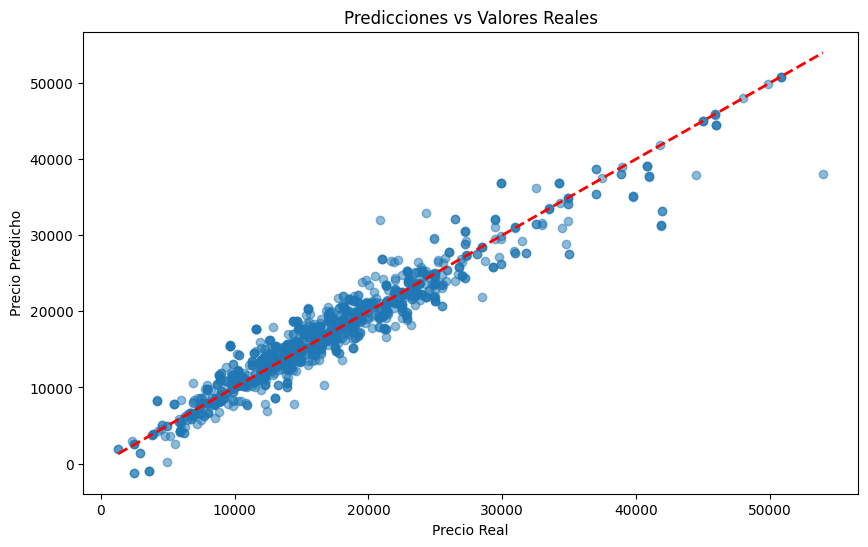


El modelo tiene un R² de 0.9242, lo que significa que explica el 92.42% de la variabilidad en los precios.


In [46]:
# Análisis de resultados
import matplotlib.pyplot as plt

# Crear un DataFrame con las predicciones para comparar
results_df = pd.DataFrame({
    'Precio_Real': y_test,
    'Precio_Predicho': y_pred,
    'Diferencia': y_test - y_pred,
    'Error_Porcentual': ((y_test - y_pred) / y_test * 100).abs()
})

print("Primeras 10 predicciones:")
print(results_df.head(10))

print(f"\nEstadísticas del error:")
print(f"Error promedio: {results_df['Diferencia'].mean():.2f}")
print(f"Error absoluto promedio: {results_df['Diferencia'].abs().mean():.2f}")
print(f"Error porcentual promedio: {results_df['Error_Porcentual'].mean():.2f}%")

# Gráfico de predicciones vs valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Precio Real')
plt.ylabel('Precio Predicho')
plt.title('Predicciones vs Valores Reales')
plt.show()

print(f"\nEl modelo tiene un R² de {r2:.4f}, lo que significa que explica el {r2*100:.2f}% de la variabilidad en los precios.")